<h1 style='color: blue; font-size: 36px; font-weight: bold;'>TECH CHALLENGE - FASE 4 - APLICAÇÃO COM STREAMLIT</h1>

# O Problema

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Fomos contratados por uma consultoria para analisar os dados de preço do petróleo Brent. Um importante cliente do setor solicitou o desenvolvimento de um dashboard interativo que forneça insights valiosos para apoiar a tomada de decisões estratégicas. Além disso, foi requisitado o desenvolvimento de um modelo de Machine Learning para realizar previsões (forecasting) do preço do petróleo, visando otimizar a gestão e os planos futuros do cliente.

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nosso objetivo consiste em:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>Criar um dashboard interativo;</li>
<li>Gerar um strorytelling que traga insights relevantes sobre a variação do preço do petróleo brent, como situações geopolíticas, crises econômicas, demanda global por energia e etc;</li>
<li>Criar um modelo de Machine Learning que faça a previsão do preço do petróleo brent diariamente;</li>
<li>Criar um plano para fazer o deploy do modelo em produção;</li>
<li>Gerar um MVP (Minimum Viable Product) do modelo em produção por meio do Streamlit.</li>

# Introdução

## O que é o Ipea ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Instituto de Pesquisa Econômica Aplicada (Ipea) é uma fundação pública federal vinculada ao Ministério do Planejamento e Orçamento, que desempenha um papel essencial no suporte técnico e institucional às ações governamentais. Sua missão é contribuir para a formulação e aprimoramento de políticas públicas e programas de desenvolvimento por meio de pesquisas e análises detalhadas. O Ipea dissemina seu trabalho por meio de publicações eletrônicas, impressas e da realização de eventos, promovendo o acesso a informações de alta relevância para gestores, acadêmicos e o público em geral.

## O que é o Petróleo Brent ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O petróleo Brent, produzido no Mar do Norte, é um benchmark importante para o preço internacional do petróleo. Ele é avaliado pelo preço FOB (free on board), que não inclui despesas de frete e seguro. O Brent serve como referência para a precificação de diversos tipos de petróleo no mercado global.

# Obtenção dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os dados utilizados neste trabalho foram obtidos a partir do site do Instituto de Pesquisa Econômica Aplicada (Ipea). Eles podem ser acessados diretamente por meio do seguinte link:
    
http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view

Essa fonte garante a confiabilidade e a relevância das informações para análises econômicas aprofundadas.


# Apresentação dos Dados

## Importanto Bibliotecas

In [ ]:
# Variáveis de Ambiente - Importe caso necessário

!pip install pandas==2.2.3 > /dev/null 2>&1
!pip install matplotlib==3.8.4 > /dev/null 2>&1
!pip install numpy==1.26.4 > /dev/null 2>&1
!pip install seaborn==0.12.2 > /dev/null 2>&1
!pip install scikit-learn==1.2.2 > /dev/null 2>&1
!pip install statsforecast > /dev/null 2>&1
!pip install "dask[dataframe]" > /dev/null 2>&1


In [ ]:
# Bibliotecas para Análise a Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import statsmodels.api as sm


# Bibliotecas para Análise das Séries Temporais
from statsmodels.tsa.seasonal import seasonal_decompose # Decomposição da Série Temporal
from statsmodels.tsa.stattools import adfuller # Teste de Dickey-Fuller
from statsmodels.tsa.stattools import acf, pacf # Análise de Autocorrelação e Autocorrelação Parcial
from statsforecast import StatsForecast


# Bibliotecas para Criação do Modelo
from statsmodels.tsa.arima.model import ARIMA # ARIMA
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importando a Métrica de Erro
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='white')
%matplotlib inline

## Visualização dos Dados

In [ ]:
import pandas as pd
dados = pd.read_csv('/precos_petroleo_brent.csv', sep=';')
dados.head()

,data,preco
0,22/04/2024,"87,30"
1,19/04/2024,"87,96"
2,18/04/2024,"88,34"
3,17/04/2024,"89,54"
4,16/04/2024,"91,29"


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como podemos observar, em nosso DataFrame possuímos as seguintes colunas:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>data</b>: Intervalo de tempo, em dias úteis</li>
<li><b>preco</b>: Preço por barril do petróleo bruto tipo Brent</li>

In [ ]:
dados.shape

(11155, 2)

In [ ]:
dados.isna().sum()

,0
data,0
preco,0


In [ ]:
dados.infer_objects()

,data,preco
0,22/04/2024,"87,30"
1,19/04/2024,"87,96"
2,18/04/2024,"88,34"
3,17/04/2024,"89,54"
4,16/04/2024,"91,29"
...,...,...
11150,26/05/1987,"18,63"
11151,25/05/1987,"18,60"
11152,22/05/1987,"18,55"
11153,21/05/1987,"18,45"


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    As colunas estão com o tipo de dado "object", o que neste caso não nos ajuda para a criação de um modelo de Machine Learning.

## Tratamento dos Dados

In [ ]:
dados['data_corrigida'] = pd.to_datetime(dados['data'])
dados['preco_corrigido'] = pd.to_numeric(dados['preco'].apply(lambda x: x.replace(",", ".")))
dados.drop(columns=['data','preco'], axis=1, inplace=True)
dados.rename(columns={'data_corrigida':'data','preco_corrigido':'preco'}, inplace=True)
dados.head()

,data,preco
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-16,91.29


In [ ]:
teste = len(dados)
print(teste)

11155


# Análise Exploratória dos Dados

## Verificação do Intervalo Temporal



<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como estamos trabalhando com uma base histórica de mais de 10 mil linhas, onde cada linha é um dia útil, iremos verificar qual o intervalo de tempo que nossa base possui.

In [ ]:
datamin = min(dados['data'])
datamax = max(dados['data'])
print(f'Data Mínima: {datamin}')
print(f'Data Máxima: {datamax}')

Data Mínima: 2019-01-02 00:00:00
Data Máxima: 2024-04-22 00:00:00


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Um intervalo muito grande não é necessário para esta análise e para a criação do modelo. Podemos filtrar nosso DataFrame e trazer apenas os dados dos últimos 6 anos por exemplo.

In [ ]:
ultimoano = max(dados['data'].dt.year)
primeiroano = ultimoano - 5
print(f'Primeiro ano de dados: {primeiroano}')
print(f'Último ano de dados: {ultimoano}')

Primeiro ano de dados: 2019
Último ano de dados: 2024


In [ ]:
dados = dados[dados['data'].dt.year >= primeiroano]
dados.head()

,data,preco
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-16,91.29


In [ ]:
dataminatual = min(dados['data'])
datamaxatual = max(dados['data'])
print(f'Data Mínima Atual: {dataminatual}')
print(f'Data Máxima Atual: {datamaxatual}')

Data Mínima Atual: 2019-01-02 00:00:00
Data Máxima Atual: 2024-04-22 00:00:00


## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora vamos verificar as estatísticas descritivas da nossa base, assim teremos uma noção melhor de como os dados estão se comportando.

In [ ]:
dados[['preco']].describe().T

,count,mean,std,min,25%,50%,75%,max
preco,1360.0,72.592632,21.34589,9.12,61.09,73.38,84.99,133.18


## Verificação do Outliers

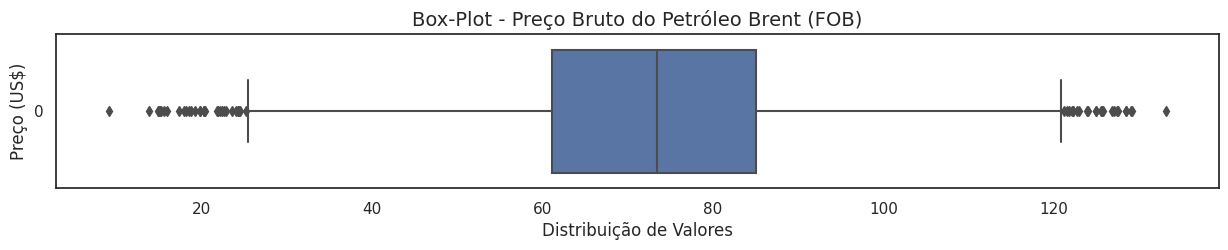

In [ ]:
plt.figure(figsize=(15,2))
ax = sns.boxplot(data=dados['preco'], orient='h')
ax.set_title(f'Box-Plot - Preço Bruto do Petróleo Brent (FOB)', fontsize=14)
ax.set_xlabel('Distribuição de Valores', fontsize=12)
ax.set_ylabel('Preço (US$)', fontsize=12)
plt.show()

## Análise da Variação Mensal

In [ ]:
# Dicionário com a tradução dos meses

meses_traducao = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez'
}

In [ ]:
var_mensal = dados.copy()

In [ ]:
var_mensal['mes'] = var_mensal['data'].dt.month
var_mensal['ano'] = var_mensal['data'].dt.year
var_mensal = var_mensal.sort_values(by=['data'], ascending=True).reset_index(drop=True)
var_mensal.head()

,data,preco,mes,ano
0,2019-01-02,54.06,1,2019
1,2019-01-03,54.06,1,2019
2,2019-01-04,53.23,1,2019
3,2019-01-05,55.64,1,2019
4,2019-01-07,57.10,1,2019


In [ ]:
# Lista de Anos
anos = var_mensal['data'].dt.year.unique()
anos

array([2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

In [ ]:
# Valores Mensais
ultimo_dia = var_mensal.groupby(['mes', 'ano'])[['data']].max().reset_index()
ultimo_dia = ultimo_dia.sort_values(by=['data'], ascending=True).reset_index(drop=True)
ultimo_dia['chave'] = ultimo_dia['mes'].astype(str) + ultimo_dia['ano'].astype(str)
ultimo_dia = pd.merge(ultimo_dia, var_mensal[['preco', 'data']], on='data')
ultimo_dia['variacao_%'] = round(ultimo_dia['preco'].pct_change() * 100, 2)
ultimo_dia['nome_mes'] = ultimo_dia['data'].apply(lambda x: x.strftime('%b')).map(meses_traducao)
ultimo_dia

,mes,ano,data,chave,preco,variacao_%,nome_mes
0,1,2019,2019-01-31,12019,61.89,NaN,Jan
1,2,2019,2019-02-28,22019,65.03,5.07,Fev
2,3,2019,2019-03-29,32019,67.93,4.46,Mar
3,4,2019,2019-04-30,42019,72.19,6.27,Abr
4,5,2019,2019-05-31,52019,66.78,-7.49,Mai
...,...,...,...,...,...,...,...
59,12,2023,2023-12-29,122023,77.69,-4.93,Dez
60,1,2024,2024-01-31,12024,82.98,6.81,Jan
61,2,2024,2024-02-29,22024,84.57,1.92,Fev
62,3,2024,2024-03-28,32024,86.17,1.89,Mar


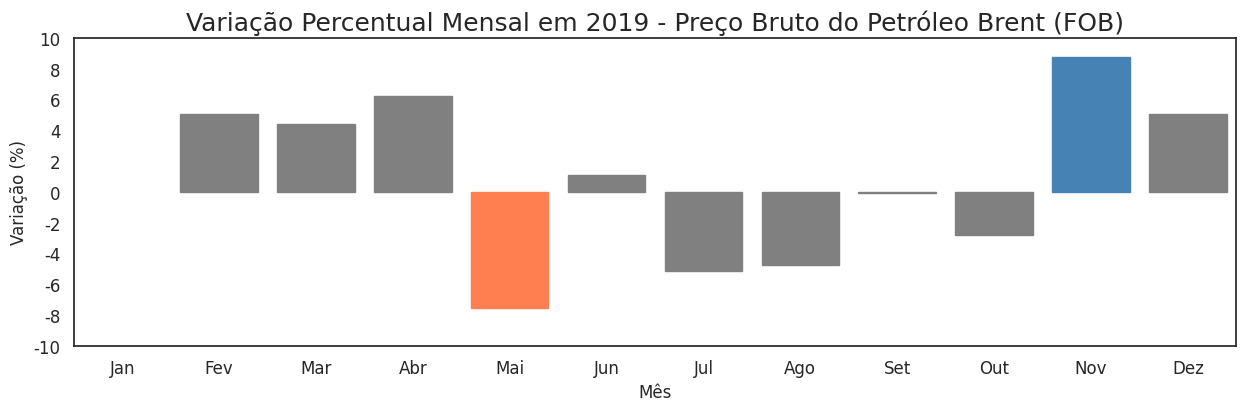

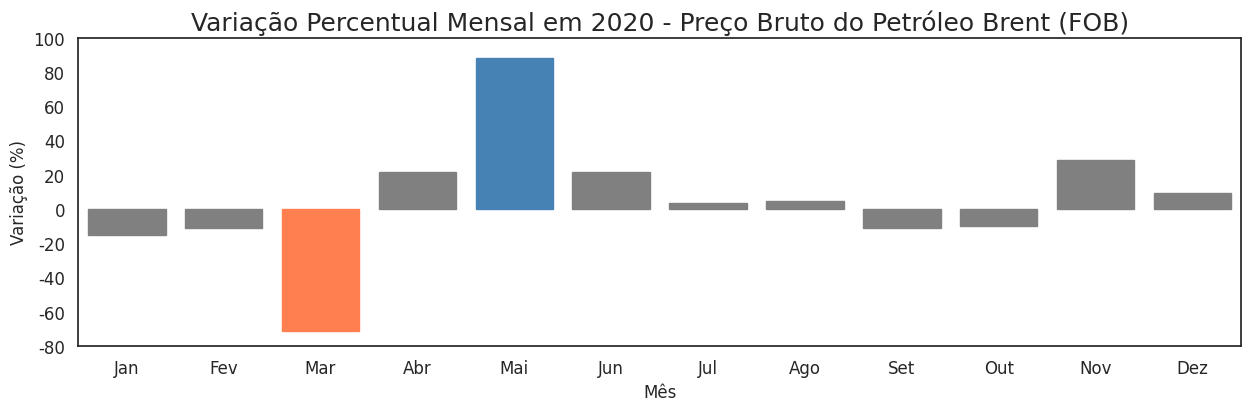

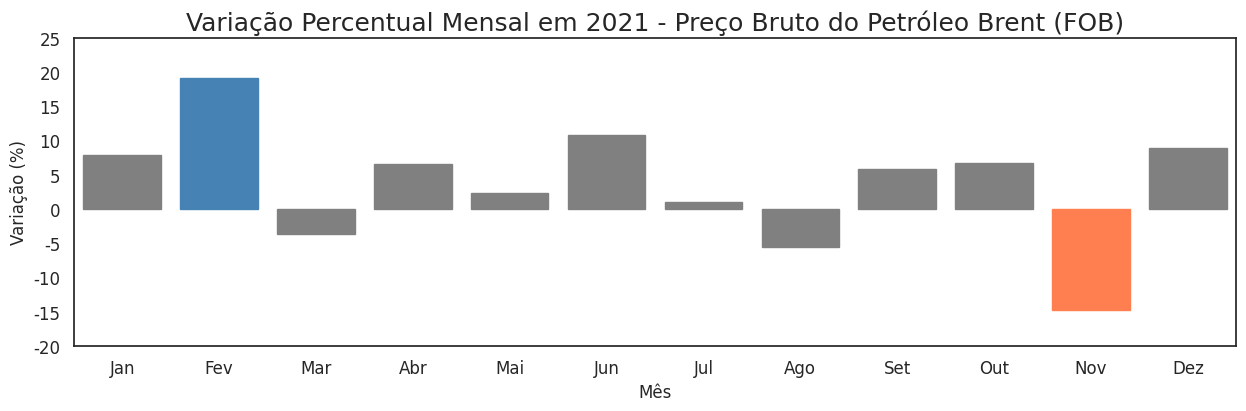

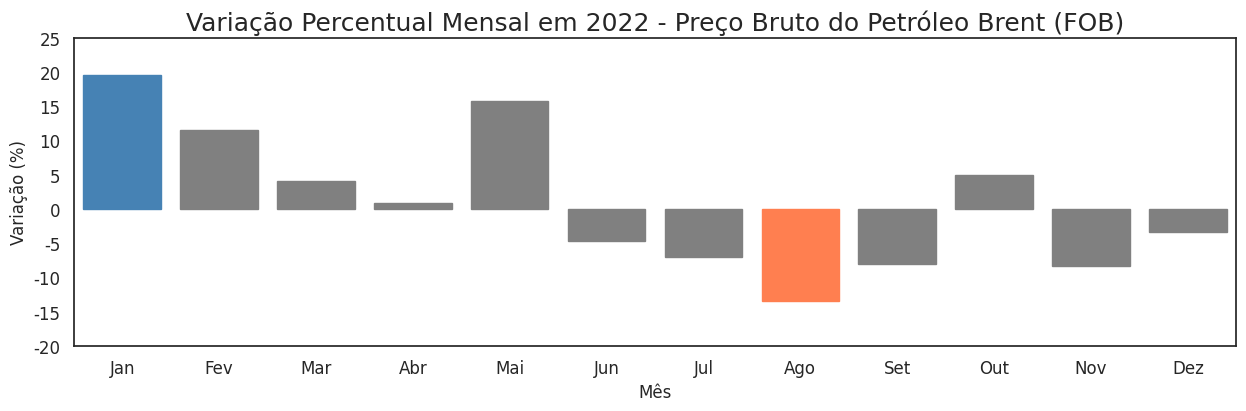

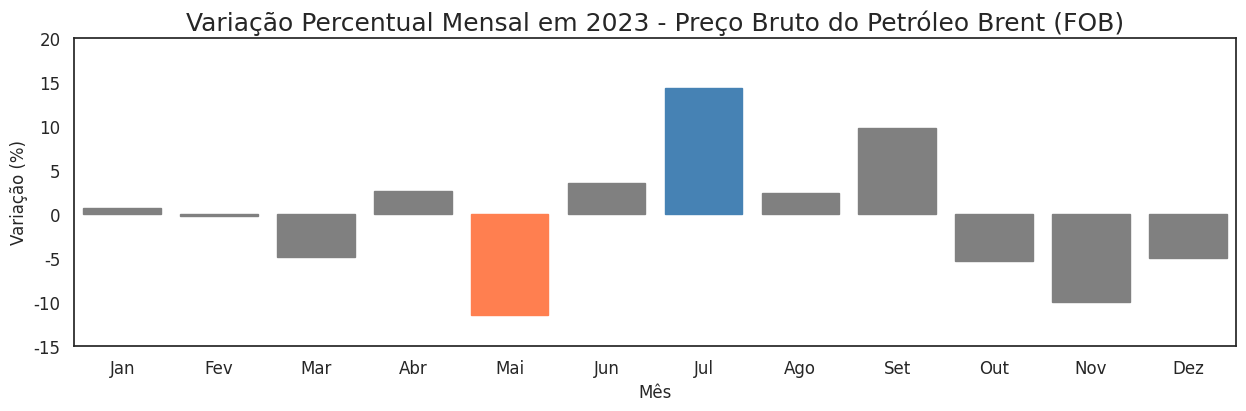

In [ ]:
# Plot da variação mensal em cada ano
for ano in anos[:-1]:
    plt.figure(figsize=(15,4))
    df_mensal = ultimo_dia[ultimo_dia['ano'] == ano]
    maior_variacao = df_mensal['variacao_%'].max()
    menor_variacao = df_mensal['variacao_%'].min()
    ax = sns.barplot(data=df_mensal, x='nome_mes', y='variacao_%')
    for bar in ax.patches:
        if bar.get_height() == maior_variacao:
            bar.set_color('steelblue')
        elif bar.get_height() == menor_variacao:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

    xtick_loc = ax.get_xticks()
    xtick_labels = ax.get_xticklabels()

    ytick_loc = ax.get_yticks()
    ytick_labels = ax.get_yticklabels()

    ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
    ax.set_yticks(ticks = ytick_loc, labels = ytick_labels, fontsize=12)

    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

    ax.set_xlabel('Mês', fontsize = 12)
    ax.set_ylabel('Variação (%)', fontsize = 12)
    ax.set_title(f'Variação Percentual Mensal em {ano} - Preço Bruto do Petróleo Brent (FOB)', fontsize = 18, horizontalalignment = "center")

    plt.show()

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>O Ano de 2020 teve a maior amplitude com variação máxima de 88.57% em Maio, e mínima de -71.06% em Março. Em 2020, em virtude da pandemia da Covid-19, os preços do marcador Brent registraram os menores valores. O isolamento social e a baixa da produção industrial impactaram negativamente a economia a nível mundial contendo a demanda por petróleo e diminuindo o preço do combustível.</li>
<li>Países exportadores de petróleo como, México, Equador, Colômbia, Venezuela, Brasil e Argentina sentiram a queda do seu valor no mercado internacional.</li>
<li>Em 2019, ano que anterior à pandemia, a variação percentual não foi maior que 10%. E é possível verificar que o impacto da pandemia ainda persiste uma vez que, em nenhum ano após 2020, a variação percentual ficou dentro da mesma amplitude que em 2019.</li>

# Análise de Séries Temporais

## O que é uma Série Temporal ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Uma série temporal é um conjunto de observações que ocorrem ao longo do tempo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Dentro da análise das séries temporais, temos três principais componentes:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Tendência: é a direção da série, ou seja, para onde o dado vai.</li>
<li>Sazonalidade: é a ocorrência de um padrão identificado dentro da série temporal.</li>
<li>Resíduo: é uma variação aleatória que não é possível de ser explicada por meio da tendência ou da sazonalidade, ou seja, os resíduos são a diferença entre a série original e o que foi explicado pela tendência e sazonalidade.</li>

## Como Funciona a Previsão da Série Temporal ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os métodos de previsão para séries temporais buscam compreender os padrões e extrapolações dos dados passados para prever dados futuros caso esse comportamento se apresente novamente. Dessa forma, o modelo aprende a prever o futuro baseado no passado.

## Análise de Tendência, Sazonalidade e Ruído

### Usar Datas como Índice

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para trabalharmos com séries temporais, nossos dados precisam estar previamente tratados e transformados de maneira que facilite a análise dos dados e criação do modelo, portanto usaremos a coluna de data como índice do DataFrame.

In [ ]:
dados_ts = dados[['preco', 'data']].set_index('data').sort_index()
dados_ts.head()

,preco
data,
2019-01-02,54.06
2019-01-03,54.06
2019-01-04,53.23
2019-01-05,55.64
2019-01-07,57.10


### Visualização dos Valores do Preço Bruto do Petróleo Brent (FOB)

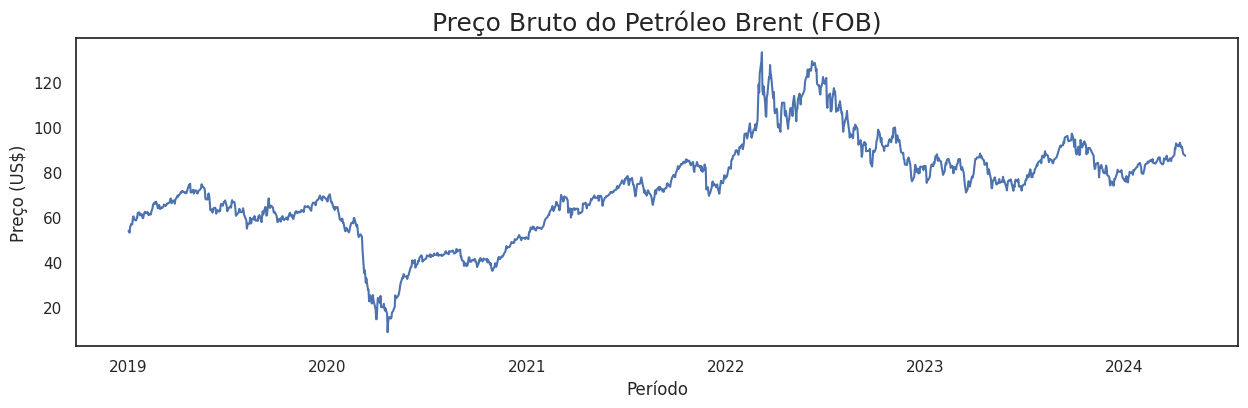

In [ ]:
plt.figure(figsize = (15,4))

plt.plot(dados_ts.index, dados_ts.preco)
plt.title('Preço Bruto do Petróleo Brent (FOB)', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Preço (US$)', fontsize=12)

plt.show()

### Decomposição da Série Temporal

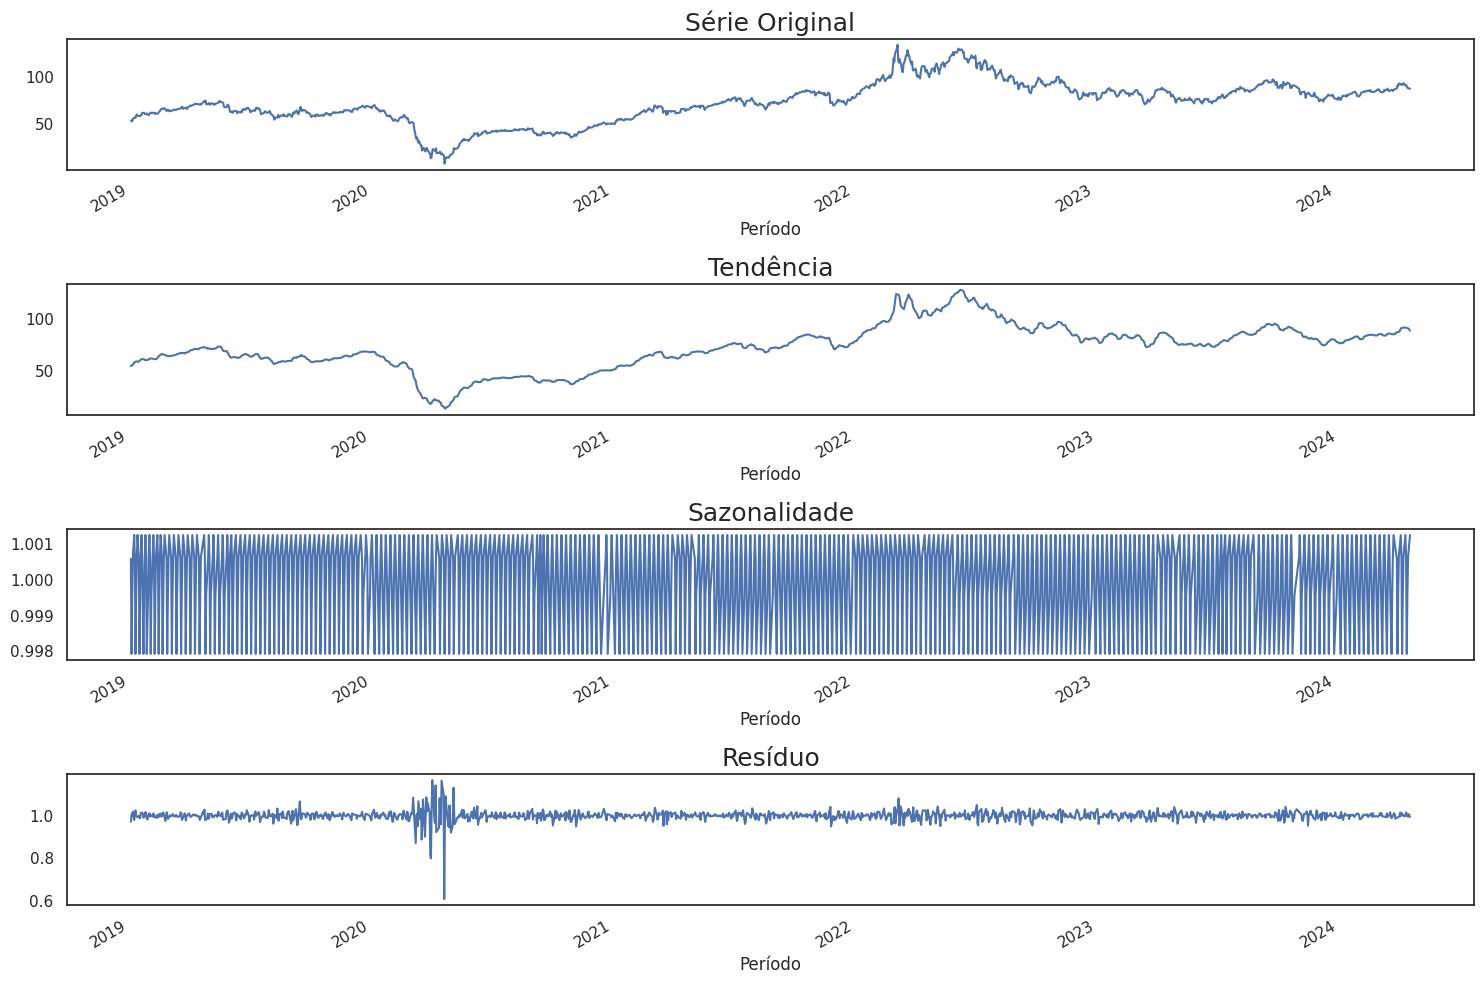

In [ ]:
# Aplicação da Decomposição
resultados = seasonal_decompose(dados_ts, model='multiplicative', period=5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

# Plot da Série Original
resultados.observed.plot(ax=ax1)
ax1.set_title('Série Original', fontsize=18)
ax1.set_xlabel('Período', fontsize = 12)

# Plot da Tendência
resultados.trend.plot(ax=ax2)
ax2.set_title('Tendência', fontsize=18)
ax2.set_xlabel('Período', fontsize = 12)

# Plot da Sazonalidade
resultados.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade', fontsize=18)
ax3.set_xlabel('Período', fontsize = 12)

# Plot do Resíduo
resultados.resid.plot(ax=ax4)
ax4.set_title('Resíduo', fontsize=18)
ax4.set_xlabel('Período', fontsize = 12)

plt.tight_layout()

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>É possível verificar que a tendência da série não caminha em uma única direção.</li>
<li>A sazonalidade se torna um desafio para ser interpretada. Nossos dados são preços que variam diariamente, portanto encontrar um padrão que se repete ao longo do período é extremamente difícil.</li>
<li>Ao analisarmos os resíduos, observamos um ruído muito expressivo no começo do ano de 2020. Em nossa última análise, a justificativa para este ruído é o impacto da pandemia no preço do barril de petróleo, que teve variações positivas e negativas altíssimas em um curto período de tempo</li>

# Construção do Modelo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora partiremos para a construção dos modelos. Nosso objetivo é escolher um modelo que será utilizado para realizar as previsões diárias, e ser publicado por meio de uma aplicação web com o Streamlit. Testatemos os seguintes modelos:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Modelo ARIMA</li>
<li>Modelo Gradiente Boosting</li>

## Análise Inicial da Estacionaridade

### O que é Estacionaridade

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Alguns algoritmos que trabalham com previsões de séries temporais partem da premissa de que a série é estacionária. Isso significa que alguns períodos da série possuem a mesma média, ou seja, quando olhamos a estacionaridade, não importa a tendência ou a sazonalidade, a média continua a mesma. Entretando, séries estacionárias não performam bem com previsões de longo prazo.

### Teste de Dickey-Fuller

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Um dos testes mais utilizados para verificar a estacionaridade de uma série temporal é o teste de Dickey-Fuller Aumentado ou ADF. Esse teste parte das seguintes hipóteses:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Hipótese Nula (H0): Diz que a série não é estacionária.</li>
<li>Hipótese Alternativa (H1): Diz que a série é estacionária.</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A partir do resultado do "valor p" temos que, quando o "valor p" for menor que um determinado nível de significância nós rejeitamos a hipótese nula, sugerindo que a série temporal é estacionária.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos realizar um teste inicial apenas para comprovar uma das hipóteses. Ao julgar pelo gráfico da decomposição, nossa série não parece ser estacionária.

In [ ]:
adf = dados_ts['preco'].values

# Instanciando o Teste de Dickey-Fuller Aumentado
result = adfuller(adf)

print('-----------Teste ADF Inicial-----------')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Valor: {result[1]}')
print(f'Valores Críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

-----------Teste ADF Inicial-----------
Teste Estatístico: -1.4592348957798429
P-Valor: 0.5535723242724087
Valores Críticos:
	1%: -3.435192387210374
	5%: -2.8636785448741353
	10%: -2.5679085632868626


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Considerando um intervalo de significância de 0.05 (5%), como o valor p está acima deste intervalo, podemos afirmar inicialmente que nossa série não é estacionária.

## Modelo ARIMA

### Como Funciona o Modelo ARIMA ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O modelo ARIMA tem como premissa o uso da média móvel integrada auto-regressiva para descrever a autocorrelação nos dados. A parte auto-regressora irá olhar para o passado e achar a correlação futura, a parte integrada representa quantas vezes a série original foi diferenciada, e a média móvel deve estar próxima de um valor constante. Para utilizar o modelo ARIMA a série temporal necessariamente deve ser estacionária.

### Quais são os Hiperparâmetros do Modelo ARIMA ?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>P - Número de lags que devem ser incluídos no modelo.</li>
<li>D - Número de vezes que as observações serão diferenciadas.</li>
<li>Q - Ordem de média móvel, tamanho de uma janela (lag) de média móvel.</li>
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O número de lags (P) são os valores auto correlacionados que serão usados para prever os valores futuros. A diferenciação (D) é utilizada para deixar a série estacionária. E, a ordem da média móvel (Q) é utilizada para calcular o erro.

### Transformando a Série Original em Estacionária

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Verificamos anteriormente por meio do teste ADF que nossa série original não é estacionária. Portanto, para utilizarmos o ARIMA devemos transformar a série original em uma série estacionária.

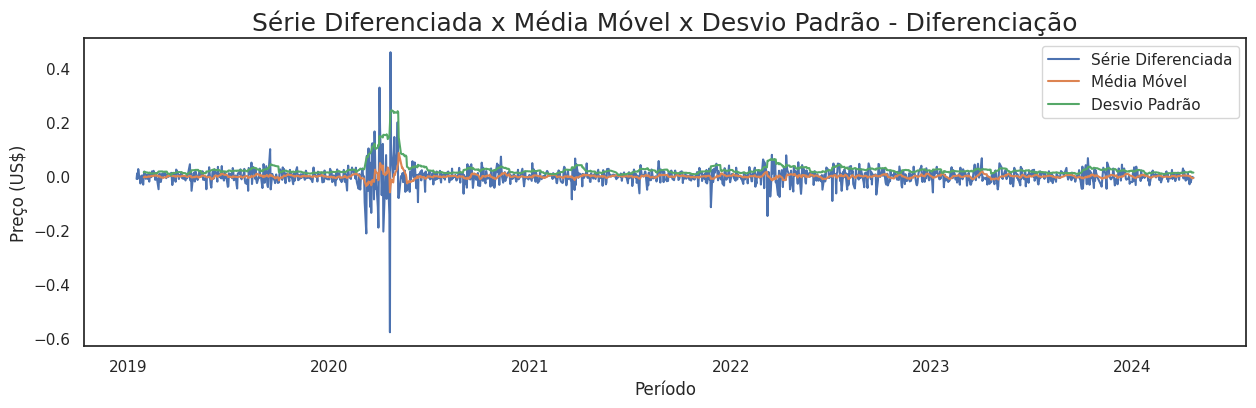

In [ ]:
# Análise da Média Móvel

media_movel = dados_ts.rolling(12).mean()

# Aplicação do Log

dados_ts_log = np.log(dados_ts)

ma_log = dados_ts_log.rolling(12).mean()

# Remoção da Média Móvel

dados_ts_s = (dados_ts_log - ma_log).dropna() # tiramos os nulos para poder subtrair sem problemas

ma_s = dados_ts_s.rolling(12).mean()

std_s = dados_ts_s.rolling(12).std()

# Análise por Diferenciação

dados_ts_diff = dados_ts_s.diff().dropna() # diferença entre o valor anterior e o atual

ma_diff = dados_ts_diff.rolling(12).mean()

std_diff = dados_ts_diff.rolling(12).std()

plt.figure(figsize=(15,4))

serie_original_s = plt.plot(dados_ts_diff, label='Série Diferenciada')
media_movel_s = plt.plot(ma_diff, label='Média Móvel')
desvio_padrao_s = plt.plot(std_diff, label='Desvio Padrão')

plt.title('Série Diferenciada x Média Móvel x Desvio Padrão - Diferenciação', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Preço (US$)', fontsize=12)

plt.legend(loc='best')

plt.show()

In [ ]:
# Aplicando o teste ADF para a diferenciação

adf_diff = dados_ts_diff['preco'].values

result = adfuller(adf_diff)

print('-----------Teste ADF Diferenciação-----------')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Valor: {result[1]}')
print(f'Valores Críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

-----------Teste ADF Diferenciação-----------
Teste Estatístico: -12.707243168366652
P-Valor: 1.0486351863163656e-23
Valores Críticos:
	1%: -3.435287448902869
	5%: -2.8637204923840334
	10%: -2.5679309018875833


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Este valor p menor que 5% já nos garante que a hipótese alternativa (H1) de que a séria é estacionária é aceitável.

### Analisando o ACF e PACF

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para desenvolver o modelo precisamos analisar a Autocorrelação (ACF), que correlaciona em apenas uma variável, ou seja, em uma mesma linha do tempo ela observa a correlação direta e/ou indireta entre dois pontos. E a Autocorrelação Parcial (PACF), que só lida com a correlação direta entre dois pontos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora trabalharemos com os limites críticos calculados anteriormente.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Utilizaremos a equação 1.96 / sqrt(N - d), onde N = número de pontos do dataframe e d = número de vezes que diferenciamos o dataframe. Em nosso caso nós diferenciamos o dataframe apenas uma vez.

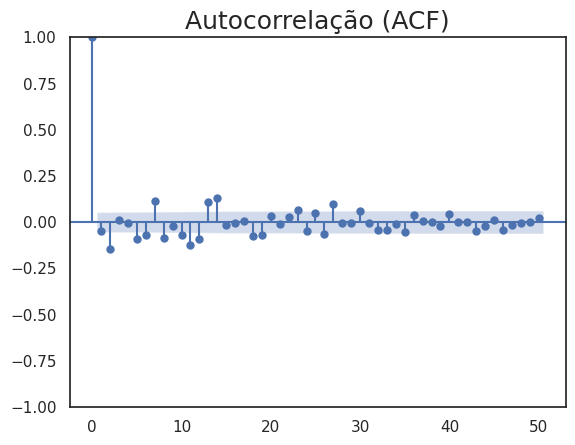

In [ ]:
sm.graphics.tsa.plot_acf(dados_ts_diff, lags=50)

plt.title('Autocorrelação (ACF)', fontsize=18)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    No ACF, as observações fora da área que representa o intervalo de confiança, são consideradas correlacionadas estatísticamente. Portanto, para uma janela de tempo de 50 dias, todos as observações se correlacionam estatísticamente.

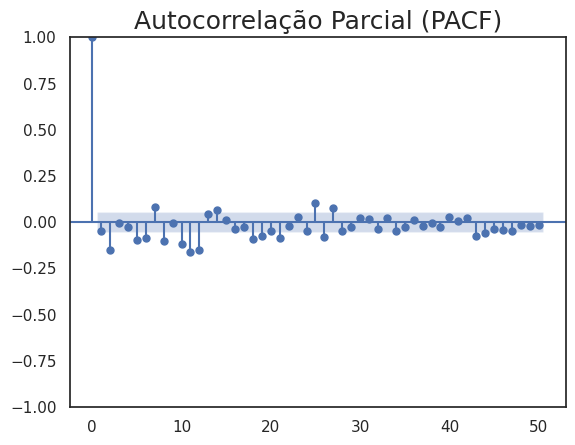

In [ ]:
sm.graphics.tsa.plot_pacf(dados_ts_diff, lags=50)

plt.title('Autocorrelação Parcial (PACF)', fontsize=18)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para o PACF, a análise geralmente está relacionada com a identificação do atraso específico que contribui para a autocorrelação em um determinado ponto, que em nosso caso, foi um lag.

### Aplicação do Modelo ARIMA

MAPE: 387.05%


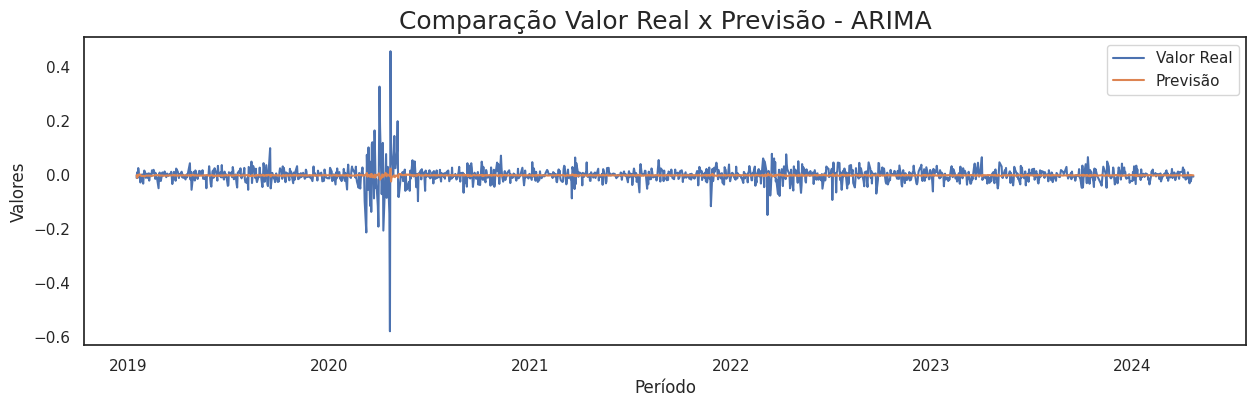

In [ ]:
# Instanciando o Modelo
arima = ARIMA(dados_ts_diff, order=(1,1,1))

# Fit e Predict do Modelo
resultados = arima.fit()
previsao = resultados.predict()

# Cálculo do MAPE
previsao.index = dados_ts_diff.index # Ajuste do índice
valores_previstos = dados_ts_log['preco'].iloc[0] + np.cumsum(previsao) # Invertendo a diferenciação
mape = mean_absolute_error(dados_ts_diff['preco'], valores_previstos) * 100
print(f"MAPE: {mape:.2f}%")

# Plot Comparando Valor Real e Previsão
plt.figure(figsize=(15,4))
plt.plot(dados_ts_diff)
plt.plot(previsao)
plt.legend(labels=['Valor Real','Previsão'], loc='best')
plt.title('Comparação Valor Real x Previsão - ARIMA', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O MAPE (Mean Absolute Percentage Error) é o percentual do erro médio absoluto. Quanto mais perto de zero, melhor é o modelo. O modelo não performou bem, pelo gráfico podemos ver o quão distante as previsões estão dos valores reais.

## Modelo Gradient Boosting

### Como Funciona o Modelo Gradient Boosting ?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O algoritmo Gradient Boosting é uma técnica de aprendizado de máquina pertencente ao grupo de classificadores Ensemble, que combina os resultados de vários modelos "mais fracos" para criar um modelo final mais robusto e com maior precisão. A abordagem se baseia no treinamento sequencial de modelos, onde cada classificador "fraco" é treinado com um conjunto de dados, e o modelo subsequente aprende a corrigir os erros do modelo anterior. O objetivo principal desse processo é a redução progressiva do erro.
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A cada iteração, um novo modelo é ajustado para minimizar os erros cometidos pelos modelos anteriores, contribuindo assim para uma melhoria contínua do desempenho. Quanto menor o erro de um modelo, maior será a sua contribuição para o modelo final, resultando em um modelo preditivo mais preciso e eficaz.

### Quais são os Hiperparâmetros do Modelo Gradient Boosting ?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>learning_rate: Taxa de aprendizado. Determina a importância de cada árvore de decisão utilizada pelos modelos "fracos". Determinado no intervalo de 0.0 a 1.</li>
<li>n_estimators: Número de etapas (árvores de decisão) que serão utilizadas no modelos "fracos"</li>
<li>max_depth: Profundidade da árvore de decisão</li>

### Aplicação do Modelo Gradient Boosting

In [ ]:
dados_gb = dados.copy()
dados_gb = dados_gb.sort_values(by='data', ascending=True).reset_index(drop=True)
dados_gb.head()

,data,preco
0,2019-01-02,54.06
1,2019-01-03,54.06
2,2019-01-04,53.23
3,2019-01-05,55.64
4,2019-01-07,57.10


#### Criação do Lag Feature

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Quando trabalhamos com séries temporais, o objetivo é entender a dependência entre a variável alvo e seus valores passados. Para isso, utilizamos as lag features, que representam os valores da variável em momentos anteriores. Essas lag features são essenciais para modelar a dependência temporal, pois ajudam a determinar se a variável depende de observações passadas e se essas observações podem ser usadas para prever o valor futuro.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A escolha do número de lags a ser utilizado depende da unidade temporal da série. Por exemplo, em uma série temporal diária, o lag de 1 representa a diferença de um dia entre as observações. Para identificar o número de lags mais apropriado, podemos utilizar a função de autocorrelação (ACF). Ao analisar os gráficos de autocorrelação, podemos observar que um lag de um dia, por exemplo, pode ser um bom valor a ser adotado para modelar a série temporal.

  <p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Essa abordagem permite que o modelo capture padrões temporais e melhore a previsão da variável alvo.

In [ ]:
dados_gb['preco_lag'] = dados_gb['preco'].shift(1)
dados_gb = dados_gb.dropna()
dados_gb.head()

,data,preco,preco_lag
1,2019-01-03,54.06,54.06
2,2019-01-04,53.23,54.06
3,2019-01-05,55.64,53.23
4,2019-01-07,57.10,55.64
5,2019-01-08,57.10,57.10


#### Separação em Treino e Teste

In [ ]:
# Entrada - Dados atradasos em 1 dia
X = dados_gb[['preco_lag']].values

# Saída - Dados atuais
y = dados_gb[['preco']].values

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

#### Criação do Modelo

MSE: 3.75%
MAE: 1.48%


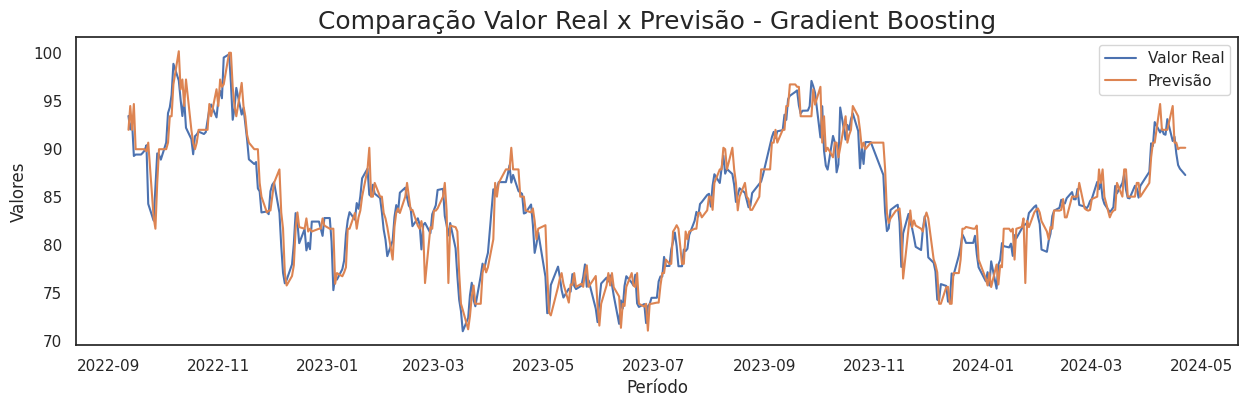

In [ ]:
# # Instanciando o Modelo
reg_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')

# Fit e Predict do Modelo
reg_gb.fit(X_train, y_train)
previsoes = reg_gb.predict(X_test)

# Cálculo do MSE e do MAE
MSE = mean_squared_error(y_test, previsoes)
MAE = mean_absolute_error(y_test, previsoes)
print(f"MSE: {MSE:.2f}%")
print(f"MAE: {MAE:.2f}%")

# Plot Comparando Valor Real e Previsão
plt.figure(figsize=(15,4))
plt.plot(dados_gb['data'].iloc[-len(y_test):], y_test)
plt.plot(dados_gb['data'].iloc[-len(previsoes):], previsoes)
plt.legend(labels=['Valor Real','Previsão'], loc='best')
plt.title('Comparação Valor Real x Previsão - Gradient Boosting', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Em comparação ao modelo ARIMA, o modelo Gradient Boosting performou muito melhor. Portanto, será o escolhido para gerar as previsões.

# Base para Aplicação no Streamlit

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Iremos criar uma base de dados tratada para facilitar a aplicação no Streamlit.

In [ ]:
df_streamlit = dados.copy()
df_streamlit['mes'] = df_streamlit['data'].dt.month
df_streamlit['ano'] = df_streamlit['data'].dt.year
df_streamlit['nome_mes'] = df_streamlit['data'].apply(lambda x: x.strftime('%b')).map(meses_traducao)
df_streamlit = df_streamlit.sort_values(by='data', ascending=True)
df_streamlit['variacao_%'] = round(df_streamlit['preco'].pct_change() * 100, 2)
df_streamlit.head()

,data,preco,mes,ano,nome_mes,variacao_%
1359,2019-01-02,54.06,1,2019,Jan,NaN
1358,2019-01-03,54.06,1,2019,Jan,0.00
1357,2019-01-04,53.23,1,2019,Jan,-1.54
1356,2019-01-05,55.64,1,2019,Jan,4.53
1355,2019-01-07,57.10,1,2019,Jan,2.62


In [ ]:
#df_streamlit.to_csv('df_streamlit.csv', index=False)

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
INSTITUTO DE PESQUISA ECONÔMICA APLICADA. Quem somos. Disponível em: https://www.ipea.gov.br/portal/coluna-3/institucional-sep/quem-somos. Acesso em: 01 de maio de 2024.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
BRASIL DE FATO. Pandemia da covid-19 gera maior crise do mercado mundial de petróleo em 30 anos. Disponível em: https://www.brasildefato.com.br/2020/04/08/pandemia-da-covid-19-gera-maior-crise-do-mercado-mundial-de-petroleo-em-30-anos. Acesso em: 02 de maio de 2024.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
SEGOVIA SPADINI, Allan. "Séries temporais e suas aplicações": Atualizado em 22/01/2021. Disponível em: https://www.alura.com.br/artigos/series-temporais-e-suas-aplicacoes. Acesso em: 15 de janeiro de 2024.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
FERNANDES CUNHA, Ana Raquel. "Predicting stock values with machine learning and deep learning algorithms". Disponível em: https://medium.com/@anaraquel.fiap/predicting-stock-values-with-machine-learning-and-deep-learning-algorithms-5eb028892888. Acesso em: 24 de janeiro de 2024.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
SILVA, Jonhy. Uma breve introdução ao algoritmo de Machine Learning Gradient Boosting utilizando a biblioteca Scikit-Learn. Atualizado em: 22 de junho de 2020. Disponível em: https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099. Acesso em: 04 de maio de 2024.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
FILIPE, Kauã. Introdução à Feature Engineering para Previsão com Séries Temporais. Atualizado em: 09 de outubro de 2022. Disponível em: https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-%C3%A0-feature-engineering-para-previs%C3%A3o-com-s%C3%A9ries-temporais-bf8bd3d0397d#:~:text=Utilizamos%20lag%20time%20features%20quando,de%20a%C3%A7%C3%B5es%20de%20uma%20empresa. Acesso em: 04 de maio de 2024.